Tarea 3

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importamos la base de datos
import pandas as pd
import numpy as np
sales= pd.read_csv("/content/supermarket_sales.csv")
sales.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
#Determinamos las dimensiones de la base de datos entregada. Esta tiene 1.000 filas y 17 columnas
sales.shape

In [ ]:
#Descripción de la base de datos, mediante resumen estadístico
sales. describe()

In [ ]:
sales = sales.drop(["Branch","Tax 5%","Customer type","Date","Time","cogs",
                    "gross margin percentage","gross income","Rating"],axis=1)
sales.head()

In [ ]:
sales.isnull().sum()

In [ ]:
#Categorías de productos que existen 
#sales["Product line"]
linea_productos= sales["Product line"].unique()
print(linea_productos)
print(len(linea_productos))

In [ ]:
# Suma de Total de cada Product line (Producto con el monto vendido mayor)
tabla_dinamica = pd.pivot_table(sales,            # data frame que voy a analizar
                         index = "Product line",  # nombre columna que quiero usar como nombre fila
                         values = "Total",        # nombre columna de los valores que voy a agrupar
                         aggfunc = "sum"          # función que voy a usar
                             )
print(tabla_dinamica.sort_values(by="Total"))

                             Total
Product line                      
Health and beauty       49193.7390
Home and lifestyle      53861.9130
Fashion accessories     54305.8950
Electronic accessories  54337.5315
Sports and travel       55122.8265
Food and beverages      56144.8440


In [ ]:
tabla_dinamica = pd.pivot_table(sales,                    # data frame que voy a analizar
                                index = "Product line",   # nombre columna que quiero usar como nombre fila
                                columns = "Gender",       # nombre de columnas
                                values = "Total",         # nombre columna de los valores que voy a agrupar
                                aggfunc = "count")        # función que voy a usar

print(tabla_dinamica)

In [ ]:
tabla_dinamica = pd.pivot_table(sales,                  # data frame que voy a analizar
                                index = "Product line", # nombre columna que quiero usar como nombre fila
                                columns = "Gender",     # nombre de columnas
                                values = "Total",       # nombre columna de los valores que voy a agrupar
                                aggfunc = "sum")        # función que voy a usar
print(tabla_dinamica)

In [ ]:
# Suma de Quantity de cada Product line (Producto más vendido)
tabla_dinamica = pd.pivot_table(sales,      # data frame que voy a analizar
                         index = "Product line",       # nombre columna que quiero usar como nombre fila
                         values = "Quantity",    # nombre columna de los valores que voy a agrupar
                         aggfunc = "sum"        # función que voy a usar
                             )
print(tabla_dinamica.sort_values(by="Quantity"))

In [ ]:
# Suma de Quantity de cada Product line (Producto más vendido)
tabla_dinamica = pd.pivot_table(sales,      # data frame que voy a analizar
                         index = "Product line",       # nombre columna que quiero usar como nombre fila
                         values = "Quantity",     # nombre columna de los valores que voy a agrupar
                         aggfunc = "sum"        # función que voy a usar
                             )
print(tabla_dinamica.sort_values(by="Quantity"))

In [ ]:
# Suma de Total de cada City (Ciudad con Monto más vendido)
tabla_dinamica = pd.pivot_table(sales,      # data frame que voy a analizar
                         index = "City",       # nombre columna que quiero usar como nombre fila
                         values = "Total",     # nombre columna de los valores que voy a agrupar
                         aggfunc = "sum"        # función que voy a usar
                             )
#tabla_dinamica = pd.pivot_table(sales, index = "Product line", values = "Unit price", aggfunc = "sum")
print(tabla_dinamica.sort_values(by="Total"))

In [ ]:
# Conteo de Invoice ID de cada Payment (Mayor forma de pago)
tabla_dinamica = pd.pivot_table(sales,      # data frame que voy a analizar
                         index = "Payment",       # nombre columna que quiero usar como nombre fila
                         values = "Invoice ID",     # nombre columna de los valores que voy a agrupar
                         aggfunc = "count"        # función que voy a usar
                             )
#tabla_dinamica = pd.pivot_table(sales, index = "Product line", values = "Unit price", aggfunc = "sum")
print(tabla_dinamica.sort_values(by="Invoice ID"))

In [ ]:
# Conteo de Invoice ID de Gender (Que sexo compra más)
tabla_dinamica = pd.pivot_table(sales,      # data frame que voy a analizar
                         index = "Gender",       # nombre columna que quiero usar como nombre fila
                         values = "Invoice ID",     # nombre columna de los valores que voy a agrupar
                         aggfunc = "count"        # función que voy a usar
                             )
print(tabla_dinamica.sort_values(by="Invoice ID"))

        Invoice ID
Gender            
Male           499
Female         501


In [ ]:
!pip install plotnine==0.8.0
import pandas as pd    #Para analizar los datos
import plotnine as p9   #Para graficar

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  ----------


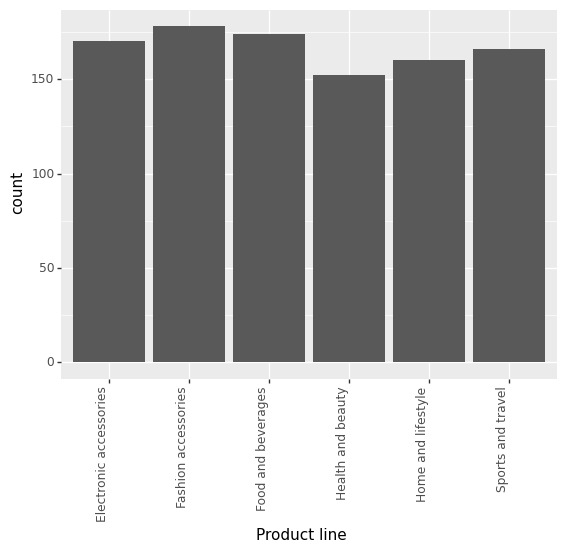

<ggplot: (8773167668069)>

In [ ]:
from plotnine import ggplot, geom_point, aes, theme, element_text
(
    p9.ggplot(sales, p9.aes(x = "Product line")) +
    p9.geom_bar() + 
    theme(axis_text_x=element_text(rotation=90, hjust=1))
)


In [ ]:
import numpy as np

sales.pivot_table('Total', ['Product line'], 'Gender',aggfunc={'Total': np.sum})

Gender,Female,Male
Product line,,
Electronic accessories,27102.0225,27235.5090
Fashion accessories,30437.4000,23868.4950
Food and beverages,33170.9175,22973.9265
Health and beauty,18560.9865,30632.7525
Home and lifestyle,30036.8775,23825.0355
Sports and travel,28574.7210,26548.1055


In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage.morphology import extrema
from skimage.morphology import watershed as skwater
from skimage.filters import threshold_otsu

def ShowImage(title,img,ctype):
  plt.figure(figsize=(10, 10))
  if ctype=='bgr':
    b,g,r = cv2.split(img)       # get b,g,r
    rgb_img = cv2.merge([r,g,b])     # switch it to rgb
    plt.imshow(rgb_img)
  elif ctype=='hsv':
    rgb = cv2.cvtColor(img,cv2.COLOR_HSV2RGB)
    plt.imshow(rgb)
  elif ctype=='gray':
    plt.imshow(img,cmap='gray')
  elif ctype=='rgb':
    plt.imshow(img)
  else:
    raise Exception("Unknown colour type")
  plt.axis('off')
  plt.title(title)
  plt.show()

<class 'numpy.ndarray'>


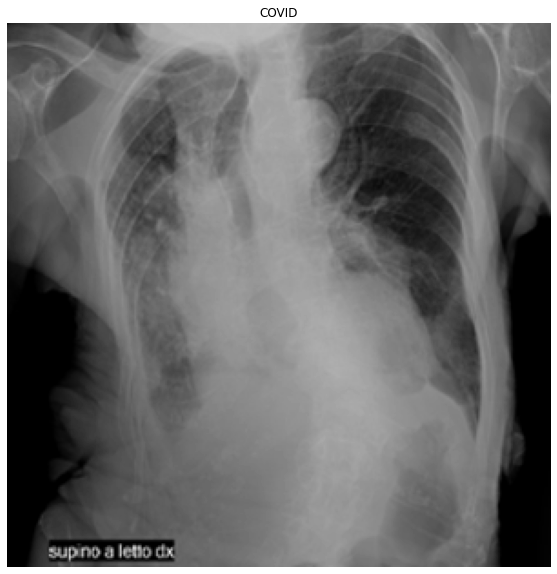

In [ ]:
#Read in image
img           = cv2.imread('/content/COVID-37.png')
gray          = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(type(gray))
ShowImage('COVID',gray,'gray')

[[255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]] 74.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (299, 299, 3) looks like an RGB image
  This is separate from the ipykernel package so we can avoid doing imports until


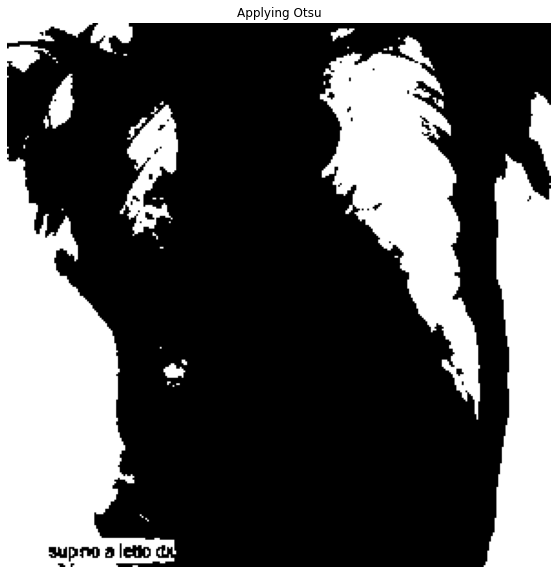

In [ ]:
#ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_OTSU)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
thresh1 = threshold_otsu(img) + 0.05
print(thresh, ret)
ShowImage('Applying Otsu',thresh,'gray')

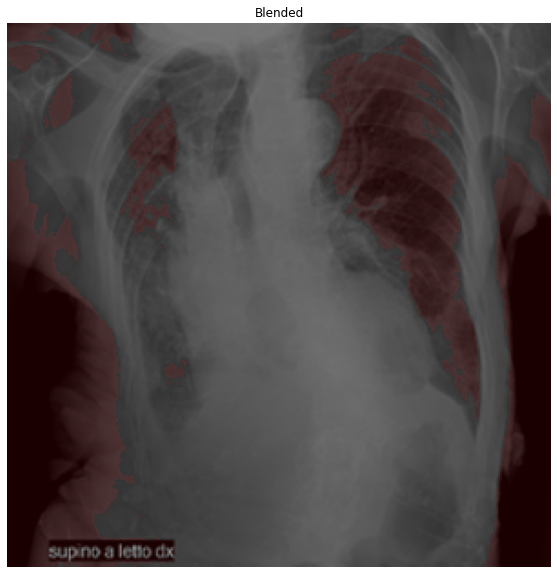

In [ ]:
colormask = np.zeros(img.shape, dtype=np.uint8)
colormask[thresh!=0] = np.array((0,0,255))
blended = cv2.addWeighted(img,0.7,colormask,0.1,0)
ShowImage('Blended', blended, 'bgr')

[329, 230, 45, 7721, 1, 194, 1, 4, 2, 1, 1, 2, 2, 1, 2, 1, 253, 2, 338, 17, 3, 1049, 13, 32, 2, 2, 1, 2, 5963, 10554, 1, 2, 2, 1, 1, 5, 2, 2, 1, 7, 63, 3, 1, 2, 2, 2, 6, 4, 6, 6, 3, 3, 3]
29
<class 'numpy.int64'>
30
4
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]
 [ True  True  True ... False False False]]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


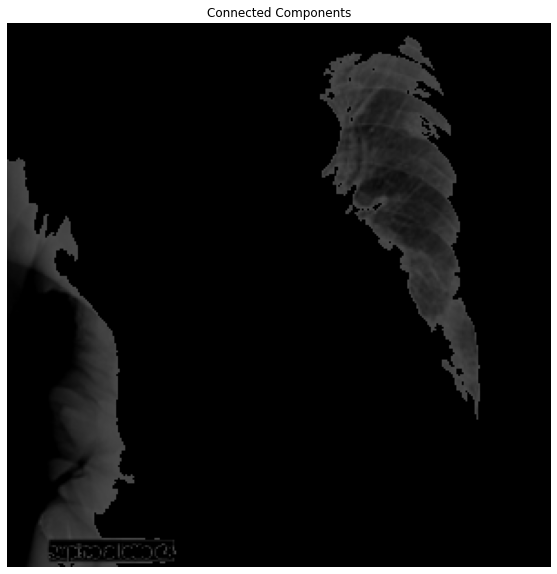

In [ ]:
from skimage.io import imread, imshow
ret, markers = cv2.connectedComponents(thresh)
#print(markers)
#Get the area taken by each component. Ignore label 0 since this is the background.
marker_area = [np.sum(markers==m) for m in range(np.max(markers)) if m!=0] 
#Get label of largest component by area
print(marker_area)
print(np.argmax(marker_area))
largest_component = np.argmax(marker_area)+1 #Add 1 since we dropped zero above 
print(type(largest_component))
marker_area[np.argmax(marker_area)] = 0  
largest_component = np.append(largest_component, [np.argmax(marker_area)+1])
print(largest_component[0])   
print(largest_component[1])                
#print(type(largest_component))#Get pixels which correspond to the brain
brain_mask = markers==largest_component[0] 
brain_mask1 = markers==largest_component[1]
print(brain_mask)
print(brain_mask1)
brain_out = img.copy()
#imshow(brain_out)
#In a copy of the original image, clear those pixels that don't correspond to the brain
#brain_out[brain_mask==False and brain_mask1==False] = (0,0,0)
brain_out[np.logical_and(brain_mask==False,brain_mask1==False)] = (0,0,0)
ShowImage('Connected Components',brain_out,'rgb')

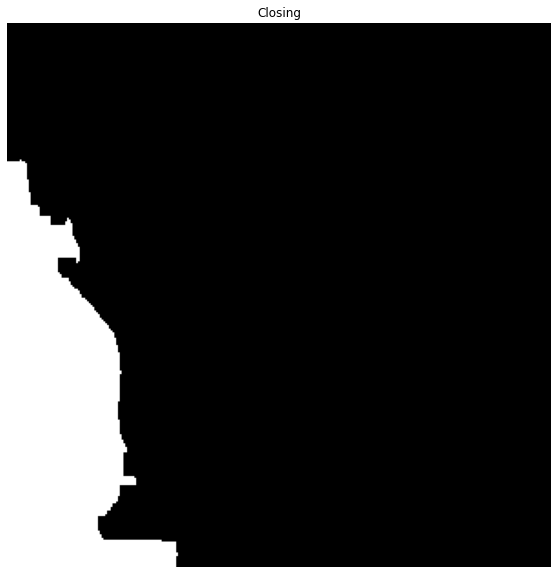

In [ ]:
#brain_mask = [brain_mask,brain_mask1]
brain_mask = np.uint8(brain_mask)
kernel = np.ones((8,8),np.uint8)
closing = cv2.morphologyEx(brain_mask, cv2.MORPH_CLOSE, kernel)

ShowImage('Closing', closing, 'gray')


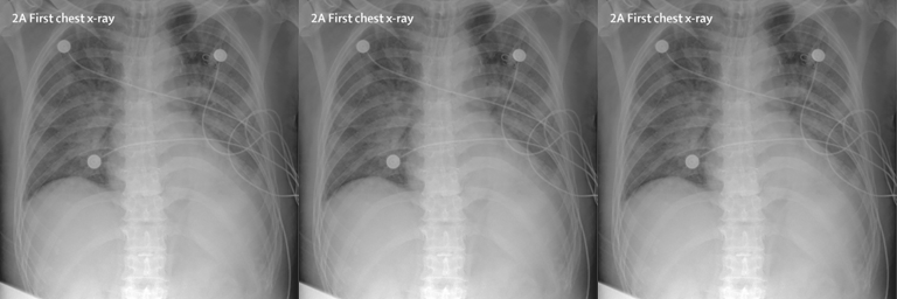

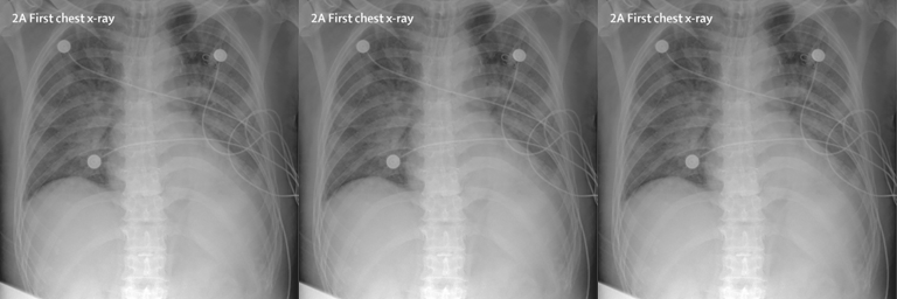

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

bgr = cv2.imread('/content/COVID-20.png')
C1 = bgr[:,:,0]
C2 = bgr[:,:,1]
C3 = bgr[:,:,2]
cv2_imshow(np.hstack([C1,C2,C3]))
rgb = cv2.cvtColor(bgr,cv2.COLOR_BGR2RGB)
C1 = rgb[:,:,0]
C2 = rgb[:,:,1]
C3 = rgb[:,:,2]
cv2_imshow(np.hstack([C1,C2,C3]))

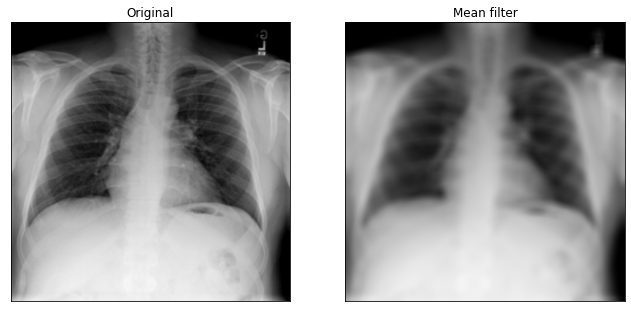

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image, ImageFilter
%matplotlib inline
image = cv2.imread('/content/Normal-7.png') # reads the image
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) # convert to HSV
figure_size = 9 # the dimension of the x and y axis of the kernal.
new_image = cv2.blur(image,(figure_size, figure_size))
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)),plt.title('Mean filter')
plt.xticks([]), plt.yticks([])
plt.show()

In [3]:
def conservative_smoothing_gray(data, filter_size):
    temp = []
    indexer = filter_size // 2
    new_image = data.copy()
    nrow, ncol = data.shape
    
    for i in range(nrow):
        for j in range(ncol):
            for k in range(i-indexer, i+indexer+1):
                for m in range(j-indexer, j+indexer+1):
                    if (k > -1) and (k < nrow):
                        if (m > -1) and (m < ncol):
                            temp.append(data[k,m])
                            
            temp.remove(data[i,j])
            max_value = max(temp)          
            min_value = min(temp)          
            if data[i,j] > max_value:               
                new_image[i,j] = max_value       
            elif data[i,j] < min_value:                
                new_image[i,j] = min_value          
            temp =[]
    
    return new_image.copy()

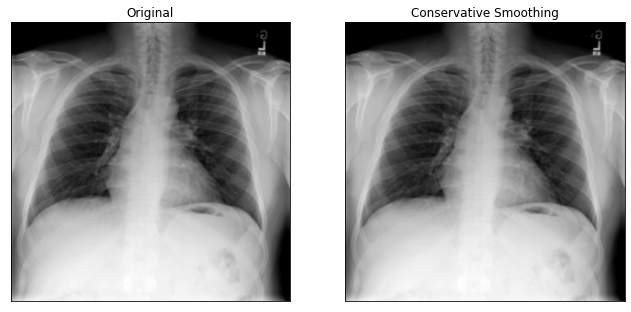

In [4]:
image2 = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
new_image = conservative_smoothing_gray(image2,5)
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(image2, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image, cmap='gray'),plt.title('Conservative Smoothing')
plt.xticks([]), plt.yticks([])
plt.show()

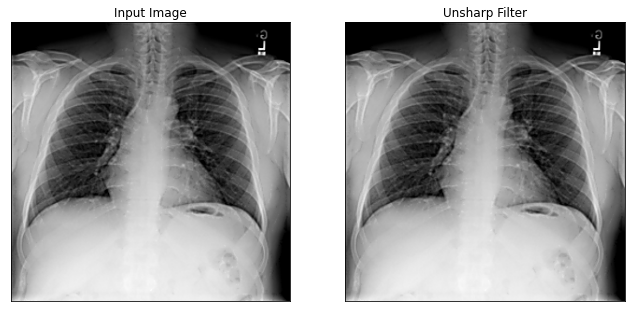

In [9]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image, ImageFilter
%matplotlib inline
image = cv2.imread('/content/Normal-7.png') # reads the image
image1 = Image.fromarray(image.astype('uint8'))
new_image = image1.filter(ImageFilter.UnsharpMask(radius=2, percent=150))
im_color2 = cv2.applyColorMap(np.array(image), cv2.COLORMAP_JET)
plt.figure(figsize=(11,6))
plt.subplot(121),plt.imshow(new_image, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(new_image, cmap = 'gray')
plt.title('Unsharp Filter'), plt.xticks([]), plt.yticks([])
plt.show()

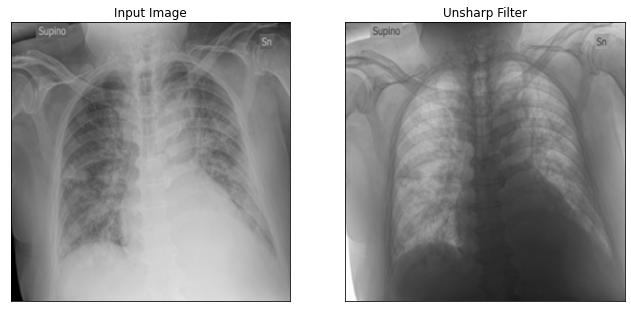

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
from PIL import Image, ImageFilter
 # Leer color original
src=cv2.imread('/content/COVID-10.png',1)
img_info=src.shape
image_height=img_info[0]
image_weight=img_info[1]
dst=np.zeros((image_height,image_weight,3),np.uint8)
for i in range(image_height):
    for j in range(image_weight):
        (b,g,r)=src[i][j]
        dst[i][j]=(255-b,255-g,255-r)
#cv2_imshow(src,dst)
#cv2_imshow(dst)
plt.figure(figsize=(11,6))
plt.subplot(121),plt.imshow(src, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst, cmap = 'gray')
plt.title('Unsharp Filter'), plt.xticks([]), plt.yticks([])
plt.show()

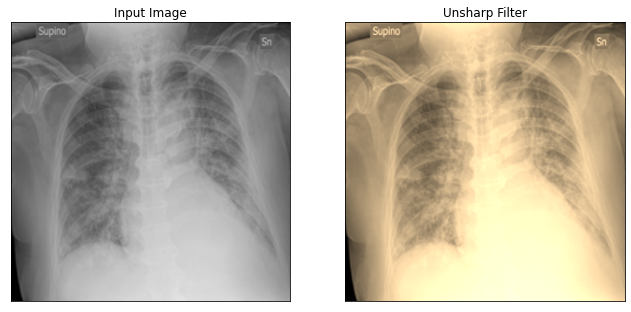

-1

In [ ]:

import cv2
import numpy as np
img=cv2.imread('/content/COVID-10.png',1)
imgInfo=img.shape
height=imgInfo[0]
weight=imgInfo[1]
#cv2.imshow('src',img)
plt.figure(figsize=(11,6))
plt.subplot(121),plt.imshow(src, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
dst=np.zeros((height,weight,3),np.uint8)
for i in range(0,height):
    for j in range(0,weight):
        (b,g,r)=img[i,j]
        b=1.5*b
        g=1.3*g
        if b>255:
            b=255
        if g>255:
            g=255
        dst[i,j]=(b,g,r)
#cv2.imshow('dst',dst)
plt.subplot(122),plt.imshow(dst, cmap = 'gray')
plt.title('Unsharp Filter'), plt.xticks([]), plt.yticks([])
plt.show()
print(dst)
cv2.waitKey(0)

(299, 299, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  # This is added back by InteractiveShellApp.init_path()


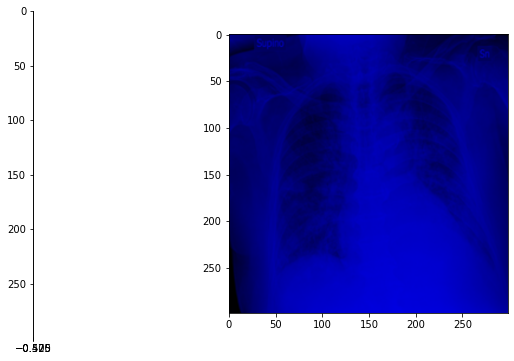

In [ ]:
from matplotlib import colors
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('/content/COVID-10.png',1)
#img = colors.rgb_to_hsv(img)
print(img.shape)
imageHSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

plt.figure(figsize=(11,6))
plt.subplot(121),plt.imshow(img[:,299:,0], plt.cm.hsv)
plt.subplot(122),plt.imshow(imageHSV, cmap = 'gray')
plt.show()

<class 'numpy.ndarray'> (299, 299)
<class 'numpy.ndarray'> (299, 299, 3)
<class 'numpy.ndarray'> (299, 299, 3)


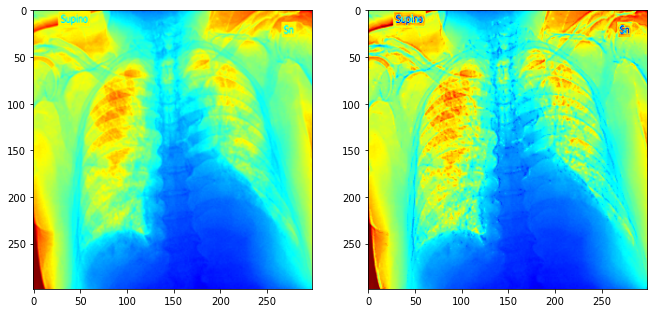

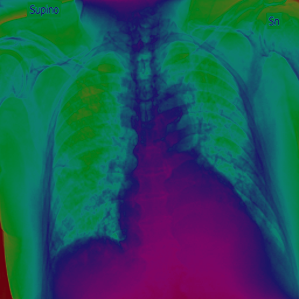

In [ ]:
import cv2 
from google.colab.patches import cv2_imshow
from PIL import Image, ImageFilter
%matplotlib inline

img = cv2.imread('/content/COVID-10.png')
im_gray = cv2.imread("/content/COVID-10.png", cv2.IMREAD_GRAYSCALE)
print(type(im_gray),im_gray.shape)
im_color = cv2.applyColorMap(im_gray, cv2.COLORMAP_JET)
im_color1 = cv2.applyColorMap(im_gray, cv2.COLORMAP_HSV)
im_gray = Image.fromarray(img.astype('uint8'))
new_image = im_gray.filter(ImageFilter.UnsharpMask(radius=2, percent=150))
print(type(np.array(new_image)),np.array(new_image).shape)
im_color2 = cv2.applyColorMap(np.array(new_image), cv2.COLORMAP_JET)

added_image = cv2.addWeighted(im_color1,0.4,im_color,0.1,0)
print(type(added_image),added_image.shape)
added_image1 = cv2.addWeighted(im_color2,0.4,im_color,0.1,0)
plt.figure(figsize=(11,6))
plt.subplot(121),plt.imshow(im_color, plt.cm.hsv)
plt.subplot(122),plt.imshow(im_color2, cmap = 'gray')
plt.show()
plt.subplot(121),plt.imshow(added_image, plt.cm.hsv)
plt.subplot(122),plt.imshow(added_image1, cmap = 'gray')
plt.show()
#cv2_imshow(added_image)

<class 'numpy.ndarray'> (299, 299)
<class 'numpy.ndarray'> (299, 299, 3)
<class 'numpy.ndarray'> (299, 299, 3)


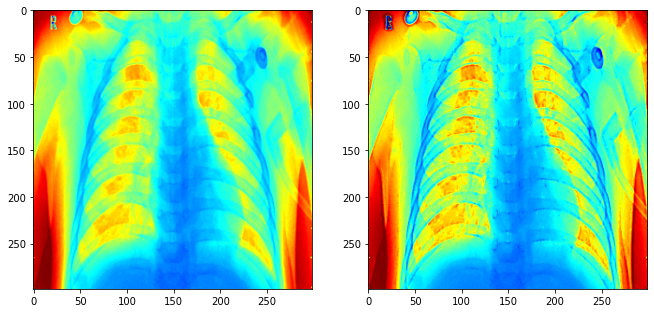

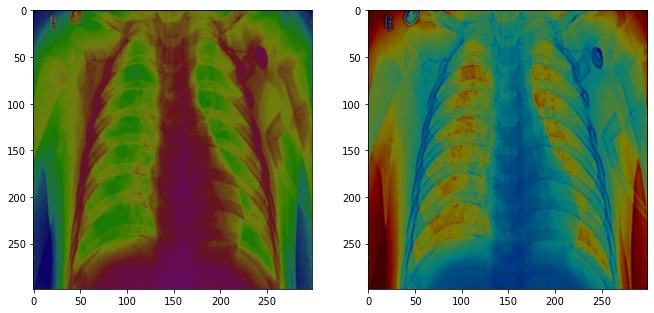

In [11]:
import cv2 
import numpy as np
from google.colab.patches import cv2_imshow
from PIL import Image, ImageFilter
from matplotlib import pyplot as plt
%matplotlib inline

img = cv2.imread('/content/Viral Pneumonia-20.png')
im_gray = cv2.imread("/content/Viral Pneumonia-20.png", cv2.IMREAD_GRAYSCALE)
print(type(im_gray),im_gray.shape)
im_color = cv2.applyColorMap(im_gray, cv2.COLORMAP_JET)
im_color1 = cv2.applyColorMap(im_gray, cv2.COLORMAP_HSV)
im_gray = Image.fromarray(img.astype('uint8'))
new_image = im_gray.filter(ImageFilter.UnsharpMask(radius=2, percent=150))
print(type(np.array(new_image)),np.array(new_image).shape)
im_color2 = cv2.applyColorMap(np.array(new_image), cv2.COLORMAP_JET)

added_image = cv2.addWeighted(im_color1,0.4,im_color,0.1,0)
print(type(added_image),added_image.shape)
added_image1 = cv2.addWeighted(im_color2,0.4,im_color,0.1,0)
plt.figure(figsize=(11,6))
plt.subplot(121),plt.imshow(im_color, plt.cm.hsv)
plt.subplot(122),plt.imshow(im_color2, cmap = 'gray')
plt.show()
plt.figure(figsize=(11,6))
plt.subplot(121),plt.imshow(added_image, plt.cm.hsv)
plt.subplot(122),plt.imshow(added_image1, cmap = 'gray')
plt.show()
#cv2_imshow(added_image)

In [2]:
#im_color2.save('/content/new_img.jpg')
cv2.imwrite('/content/new_img.jpg',im_color2)

True

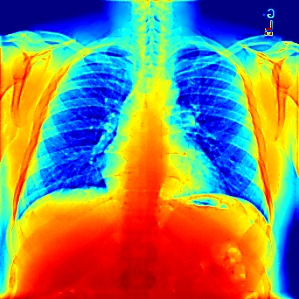

In [3]:
imgh = cv2.imread('/content/new_img.jpg')
cv2_imshow(imgh)